In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv('Diwali Sales Data.csv', encoding ='unicode_escape')

In [13]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [15]:
df.shape

(11251, 15)

In [32]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [18]:
df.dropna(inplace =True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [38]:
df['Amount'].dtypes

dtype('float64')

In [40]:
df.info

<bound method DataFrame.info of        User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

       

In [42]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [44]:
df[['Age','Amount']].describe()

,Age,Amount
count,11251.000000,11239.000000
mean,35.421207,9453.610858
std,12.754122,5222.355869
min,12.000000,188.000000
25%,27.000000,5443.000000
50%,33.000000,8109.000000
75%,43.000000,12675.000000
max,92.000000,23952.000000


# Exploratory Data Analysis


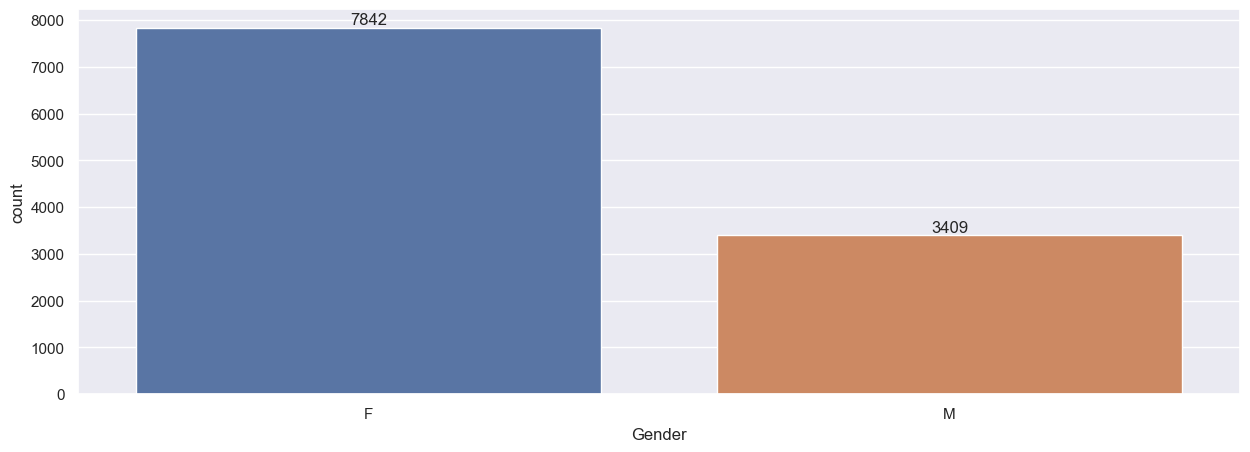

In [47]:
ax = sns.countplot(x='Gender',data =df)
for bars in ax.containers:
    ax.bar_label(bars)

In [49]:
sales_gen = df.groupby(['Gender'],as_index =False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)

<Axes: xlabel='Gender', ylabel='Amount'>

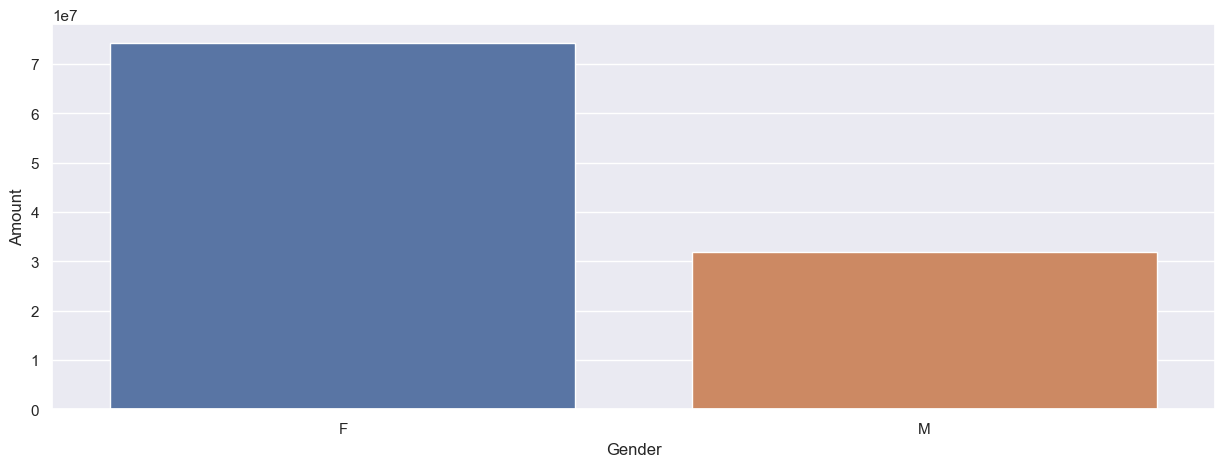

In [51]:
sns.barplot(x= 'Gender',y='Amount',data = sales_gen)

### From above graphs we can see that  most of he buyers are female and even have more purchasing power compared to men.

ax = sns.countplot(data = df, x= 'Age Group', hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

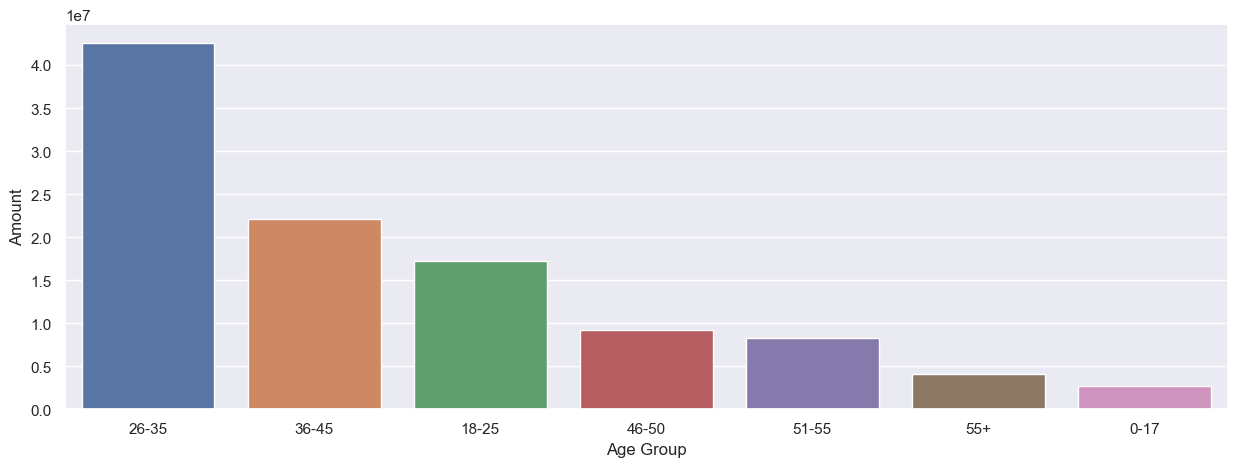

In [57]:
#Total Amount vs Age Group
sales_age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending= False)
sns.barplot(x = 'Age Group' , y='Amount' , data =sales_age)

### From above graph we can see that most of the buyers are from the age group of 26-35.


<Axes: xlabel='State', ylabel='Orders'>

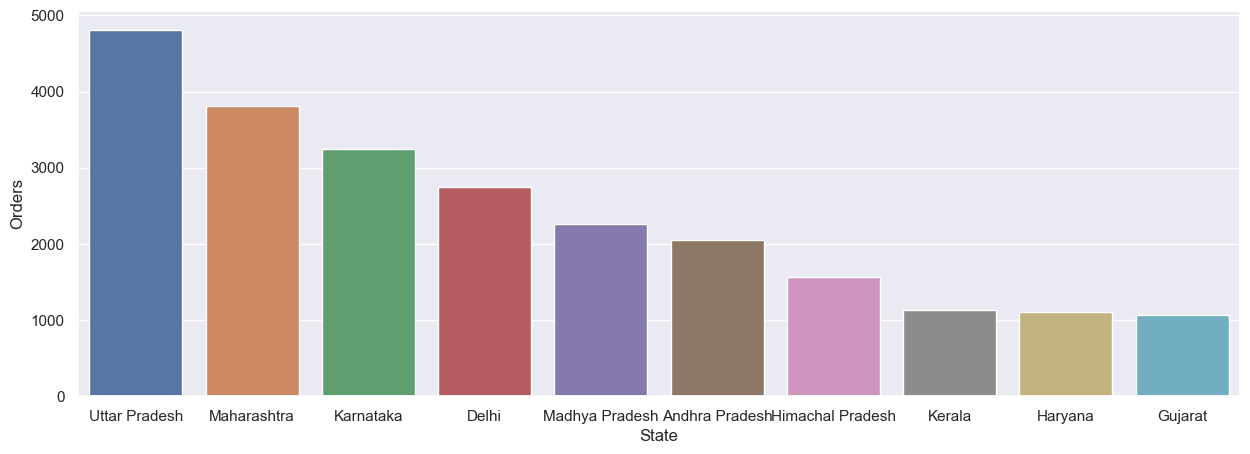

In [70]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize': (15, 5)})
sns.barplot(data=sales_state, x='State', y='Orders')  

### Here, we can see that highest orders are from Uttar Pradesh.

<Axes: xlabel='State', ylabel='Amount'>

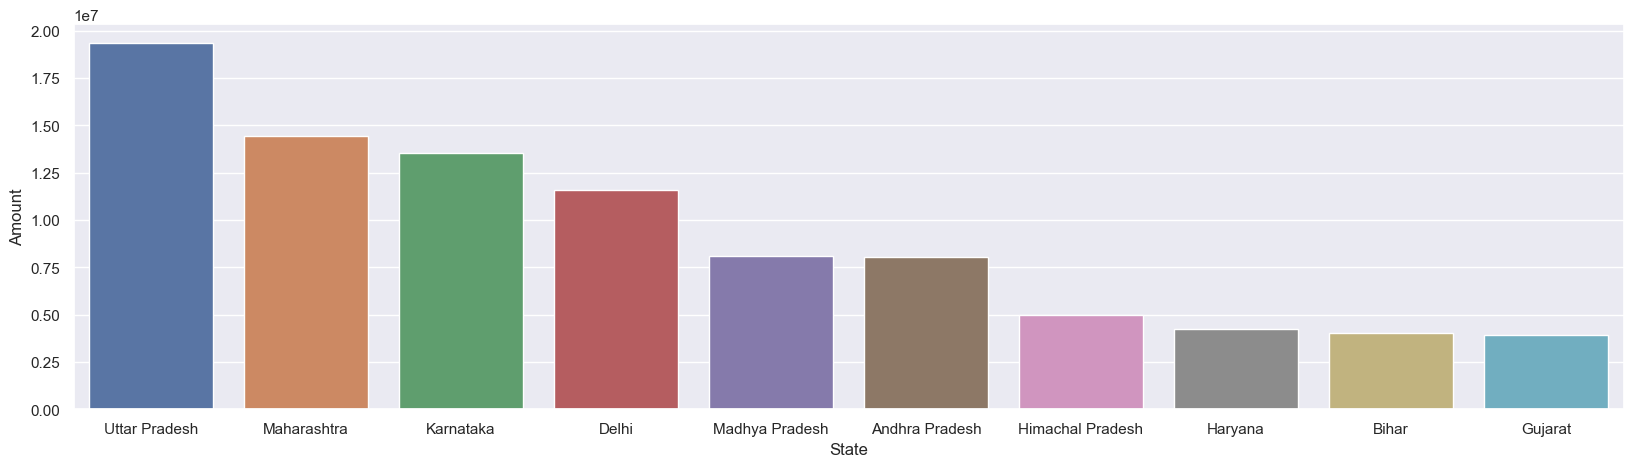

In [74]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize': (20, 5)})
sns.barplot(data=sales_state, x='State', y='Amount')  

### Highest sales amount is from Uttar Pradesh followed by Maharashtra and then Karnataka

# Marital Status

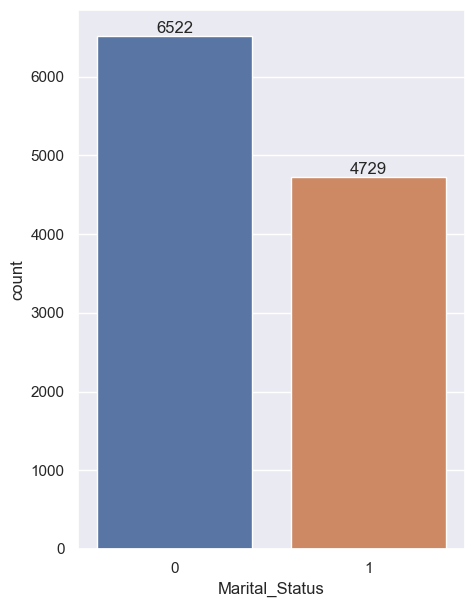

In [97]:
ax = sns.countplot(data =df , x = "Marital_Status")
sns.set(rc={'figure.figsize' : (5,7)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

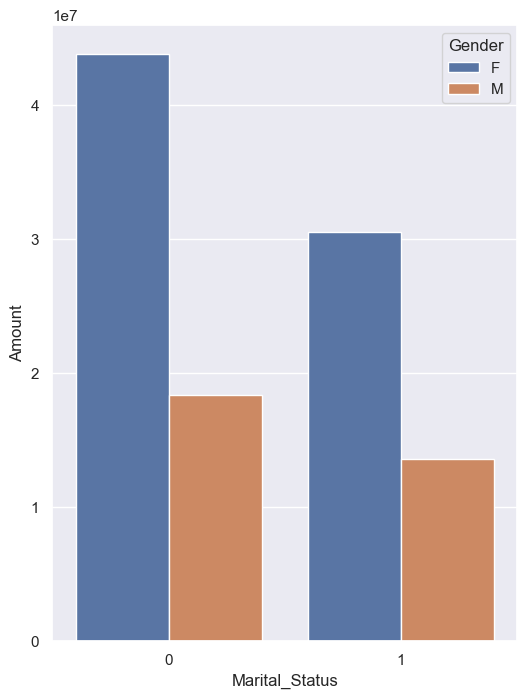

In [101]:
sales_state = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,8)})
sns.barplot(data=sales_state,x='Marital_Status',y='Amount',hue='Gender')

### Most of the buyers are married(woman) and they have high purchasing power.

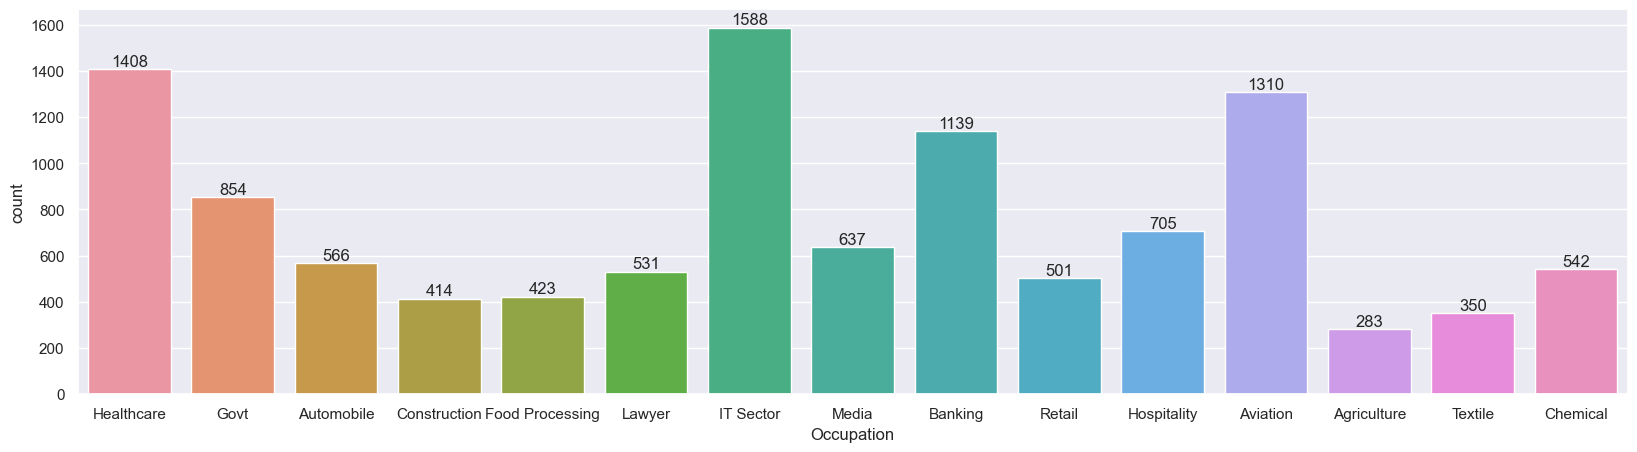

In [103]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df , x='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

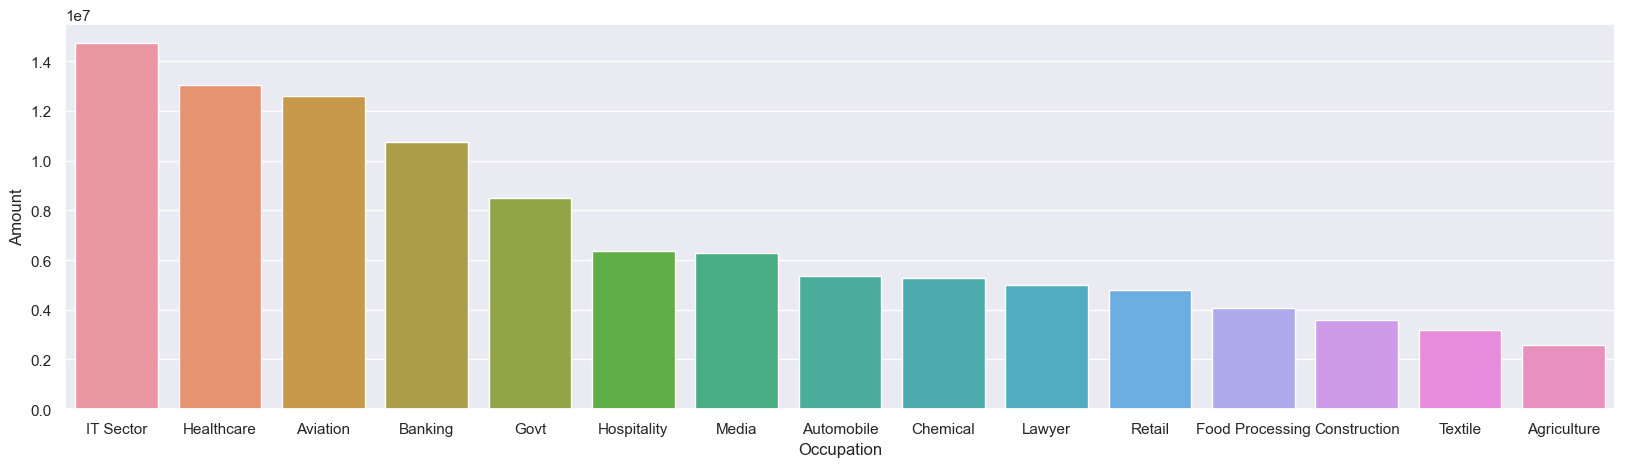

In [106]:
sales_state = df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)

sns.set(rc={'figure.figsize' : (20,5)})
sns.barplot(data = sales_state, x="Occupation", y='Amount')

### Majority of the buyers are from IT, Healthcare and Aviation sector.

# Product Category

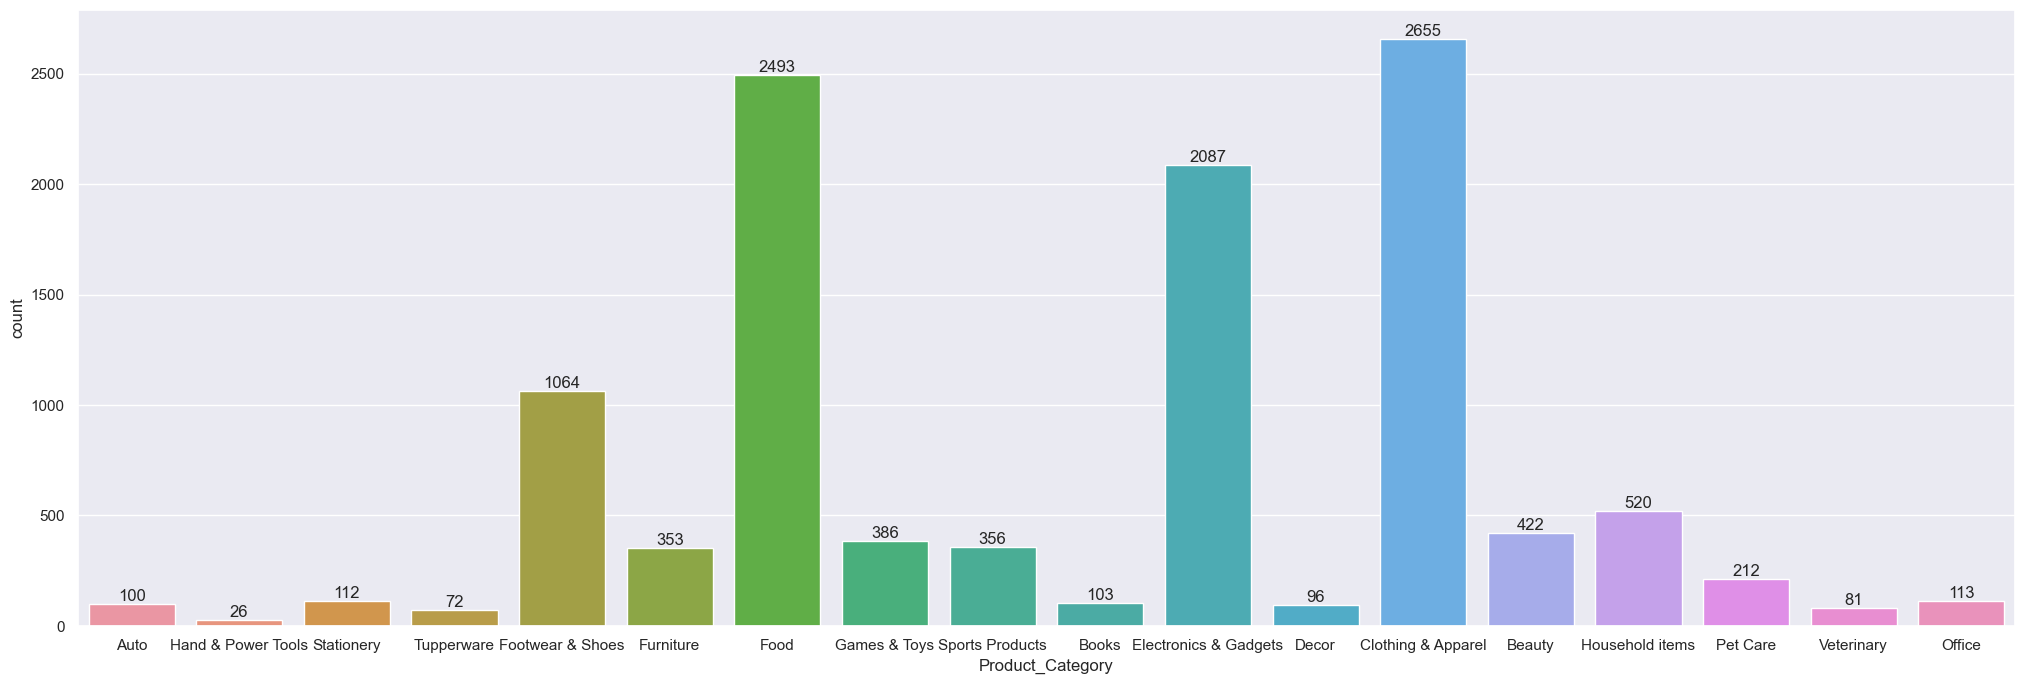

In [111]:
sns.set(rc={'figure.figsize' : (25,8) })
ax = sns.countplot(data = df , x = 'Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

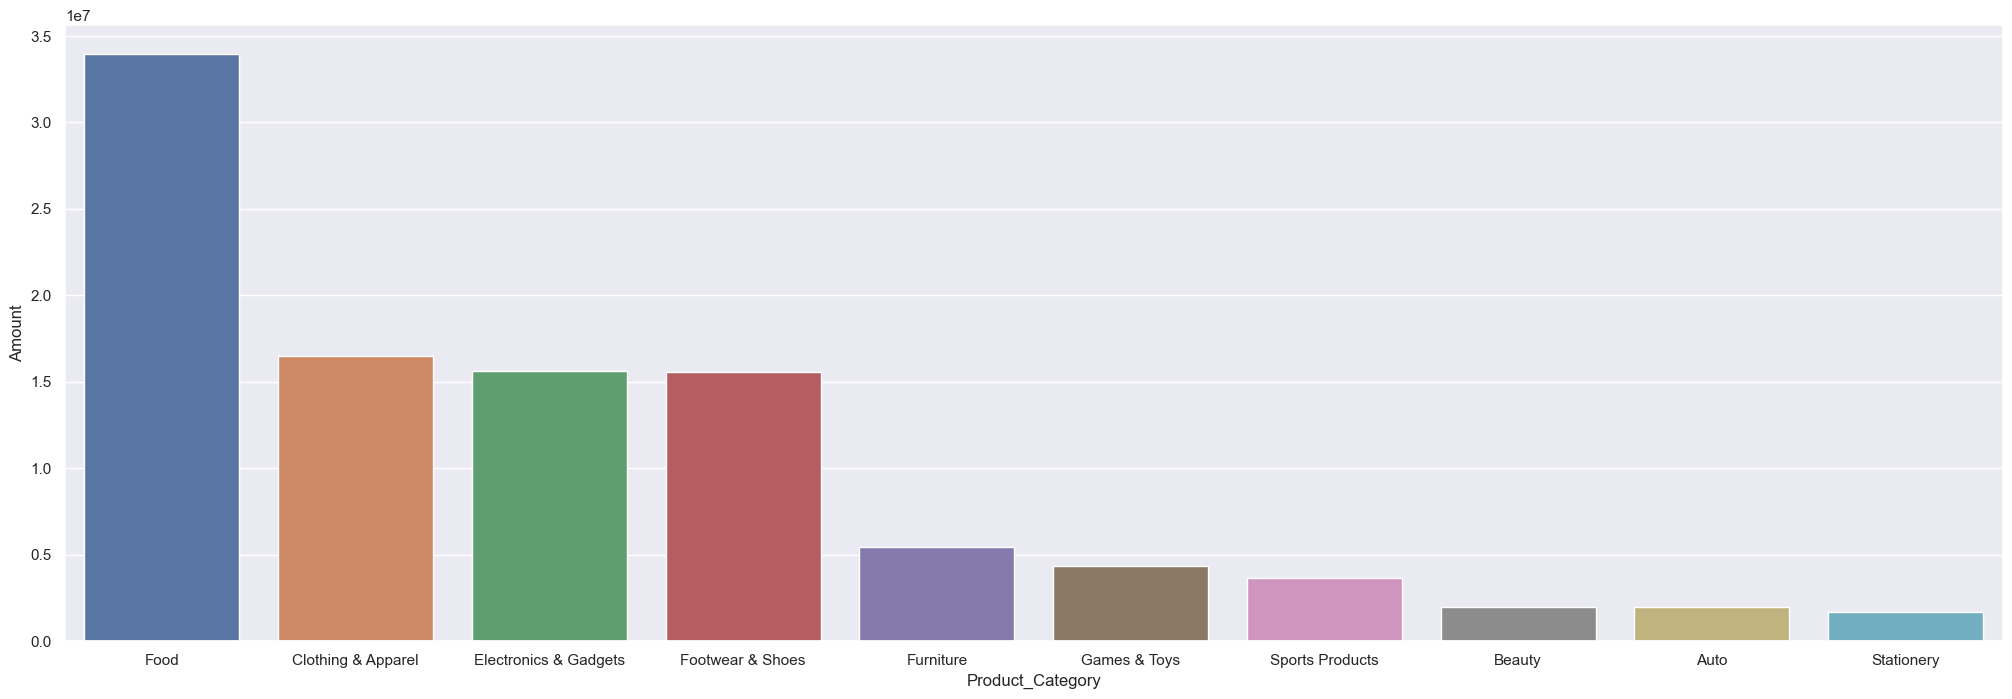

In [115]:
sales_state = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False).head(10)
sns.set(rc={'figure.figsize' :(25,8)})
sns.barplot(data = sales_state, x='Product_Category', y='Amount')

### We can see that most of the sold products are from Food, Clothing and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

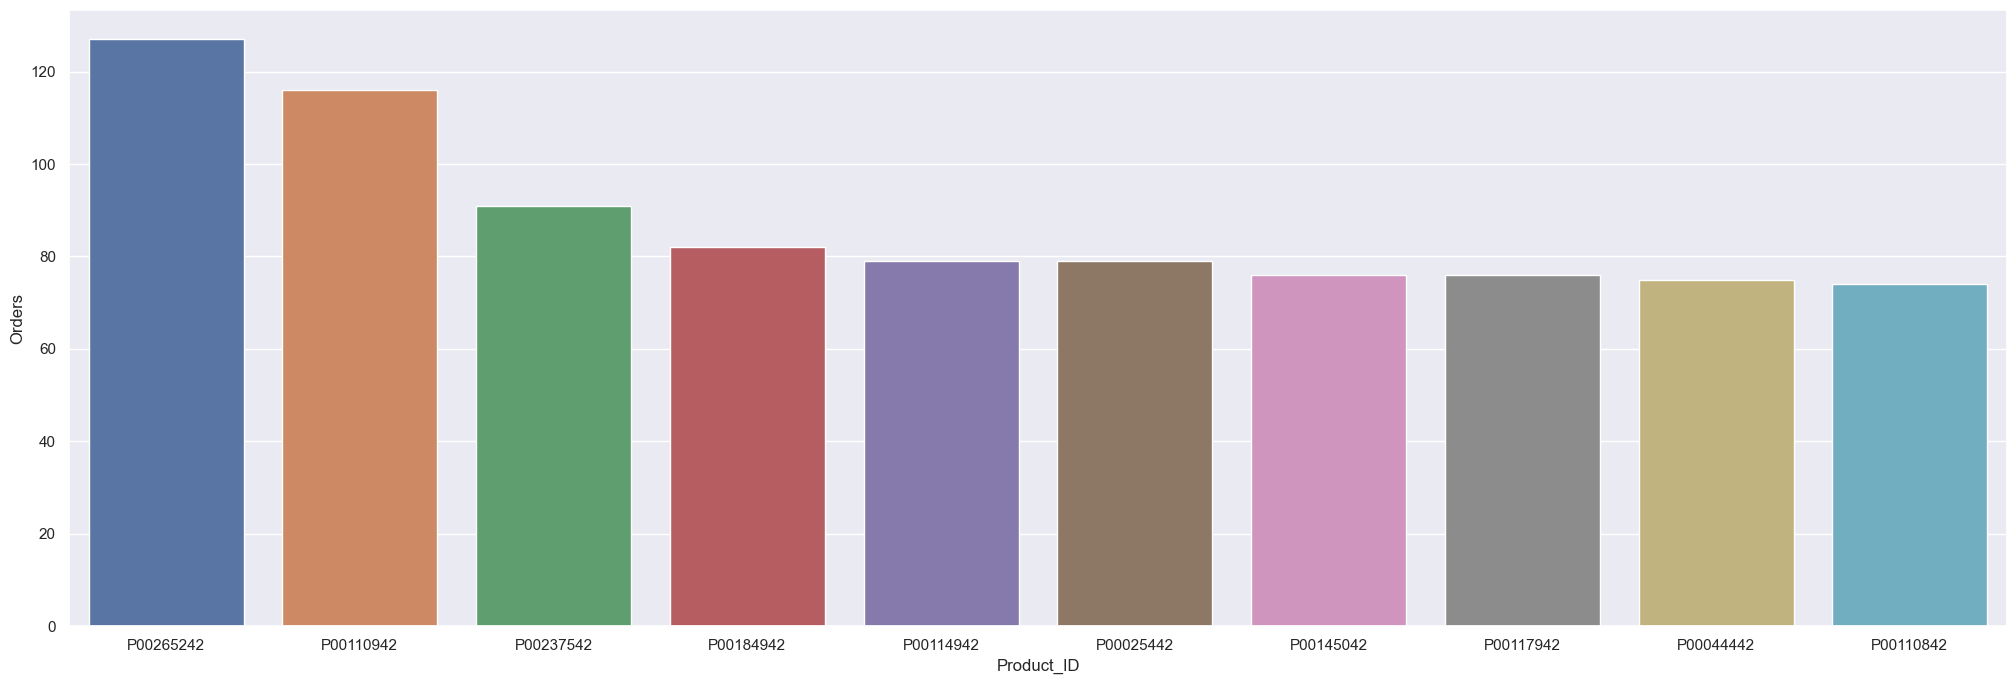

In [116]:
sales_state = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders' , ascending = False).head(10)
sns.set(rc={'figure.figsize' :(25,8)})
sns.barplot(data = sales_state, x='Product_ID', y='Orders')

<Axes: xlabel='Product_ID'>

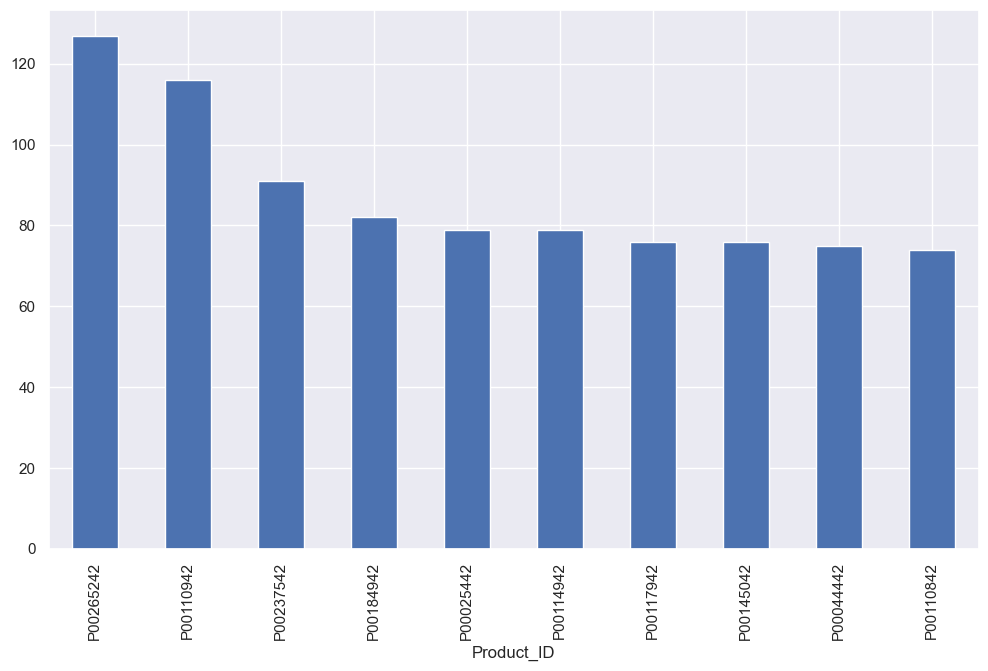

In [117]:
fig1, ax1 =plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending= False).plot(kind='bar')

# Conclusion:

### Married women from age group 26-35 years from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.